In [1]:
import ler_model
from Augment import train_datagen
import joblib
import shelve
import tensorflow as tf
import time
from config import vocabulary
import helper
import matplotlib.pyplot as plt
import numpy as np

In [2]:
batch_size = 32

In [3]:
min_ler = 1e-7

In [4]:
max_ler=10

In [5]:
mount_point = '../'

In [6]:
with shelve.open(mount_point+'IAM_Data','c') as shelf:
    train_label = shelf['train_label']

In [7]:
train_array = joblib.load(mount_point+'data/train_array')

In [8]:
n_epochs = 10

In [9]:
graph,dropout_conv,dropout_lstm,dropout_fc,inputs,time_steps,targets,loss,train,decoded,label_error_rate,seq_len,learning_rate = ler_model.model()

Convolution_Output_size:(5,29)
LSTM_Output_size:(Tensor("bidirectional_rnn/fw/fw/transpose_1:0", shape=(?, 145, 256), dtype=float32),Tensor("ReverseV2:0", shape=(?, 145, 256), dtype=float32))


In [10]:
# !rm -rf ../Augmented/*

In [11]:
train_generator = train_datagen.flow(train_array,train_label,batch_size)

In [12]:
num_training_samples = train_array.shape[0]

In [13]:
with tf.Session(graph = graph) as sess:
    sess.run(tf.global_variables_initializer())

    losses = []
    alphas = []
    
    alpha = min_ler
    
    #Mini Batch loop
    for x,y in train_generator:

        if alpha > max_ler:
            break
        
        #Need this as actual batch size may be less for the last mini-batch 
        #if num of samples is not exactly divisible.
        actual_batch_size = x.shape[0]

        sparse_y = helper._batch_y(y,vocabulary)

        feed_train = {
                     inputs:x,targets:sparse_y,
                     time_steps:np.array([seq_len]*actual_batch_size),
                     dropout_conv:0.5,dropout_fc:0.5,dropout_lstm:0.5,
                     learning_rate:alpha
                }

        _,cost_val = sess.run([train,loss],feed_dict= feed_train)
        
        losses.append(cost_val)
        alphas.append(alpha)
        
        alpha *= 10
        
        print(cost_val)

508.995
508.622
508.845
509.504
503.055
468.455
413.647
inf
inf


In [14]:
%matplotlib inline

In [19]:
alphas

[1e-07,
 1e-06,
 9.999999999999999e-06,
 9.999999999999999e-05,
 0.001,
 0.01,
 0.1,
 1.0,
 10.0]

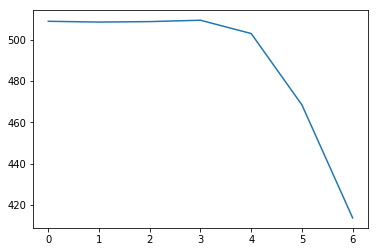

In [20]:
plt.plot(losses)

In [25]:
alphas[5]

0.01

In [15]:
# img = train_array[0].reshape(train_array[0].shape[:2])

In [16]:
# plt.imshow(img,cmap='gray')

In [17]:
# train_label[0]